In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
%matplotlib inline
sns.set_context('poster')

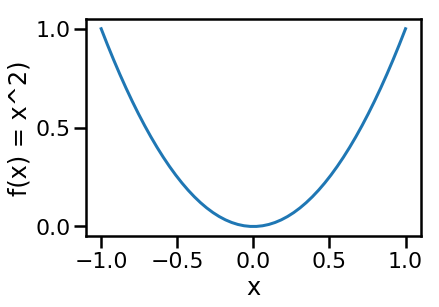

In [2]:
# Plot f(x) = x^2
xs = np.linspace(-1, 1)
squares = xs ** 2
plt.plot(xs, squares)
plt.xlabel('x')
plt.ylabel('f(x) = x^2)');

In [385]:
def check_slope(x=np.random.uniform(-1, 1)):
    xs = np.linspace(-1, 1)
    squares = xs ** 2
    plt.plot(xs, squares)
    plt.xlabel('x')
    plt.ylabel('f(x) = x^2')
    
    y = x ** 2
    plt.scatter(x, y)
    
    derivative = 2 * x
    print(f'Gradient: {derivative}')
    
    if derivative > 0:
        print('move left')
    if derivative < 0:
        print('move right')
    else:
        print('local minimum found at {x}')

In [386]:
interact(check_slope,
         x=(-1, 1, .05))

interactive(children=(FloatSlider(value=-0.8806890731754919, description='x', max=1.0, min=-1.0, step=0.05), O…

<function __main__.check_slope(x=-0.8806890731754919)>

In [5]:
iterations = 20
learning_rate = 0.1
x = np.random.uniform(-1, 1)

for _ in range(iterations):
    gradient = 2 * x
    x += learning_rate * -gradient
    print(x)

-0.5474362555266941
-0.43794900442135526
-0.3503592035370842
-0.2802873628296674
-0.2242298902637339
-0.17938391221098712
-0.1435071297687897
-0.11480570381503177
-0.09184456305202542
-0.07347565044162033
-0.05878052035329626
-0.04702441628263701
-0.03761953302610961
-0.03009562642088769
-0.02407650113671015
-0.01926120090936812
-0.015408960727494498
-0.012327168581995599
-0.009861734865596479
-0.007889387892477184


In [6]:
def gradient_descent(start=np.random.uniform(-1, 1),
                     iterations=20,
                     learning_rate=0.1):
    xs = np.linspace(-1, 1)
    squares = xs ** 2
    plt.plot(xs, squares)
    plt.xlabel('x')
    plt.ylabel('f(x) = x^2')
    
    x = start
    for _ in range(iterations):
        gradient = 2 * x
        x += learning_rate * -gradient
        y = x ** 2
        plt.scatter(x, y, color='gray', edgecolor='black', zorder=3)

In [8]:
interact(gradient_descent,
         start=(-1, 1, 0.1),
         iterations=(1, 20, 1),
         learning_rate=(0.05, 0.95, .05))

interactive(children=(FloatSlider(value=-0.06263435674202622, description='start', max=1.0, min=-1.0), IntSlid…

<function __main__.gradient_descent(start=-0.06263435674202622, iterations=20, learning_rate=0.1)>

In [9]:
data = sns.load_dataset('anscombe').query('dataset=="I"')

In [595]:
data = sns.load_dataset('anscombe').query('dataset=="I"')

def linear_regression(m=-0.1, b=3, data=data):
    
    # Plot points in data.
    sns.relplot('x', 'y', data=data)
    
    # Plot line created with our inputs.
    y_pred = m * data['x'] + b
    plt.plot(data['x'], y_pred)
    plt.show()
    
    # PLot the point on error function graph related to inputs.
    errors = y_pred - data['y']
    sse = np.sum(errors ** 2)
    plt.scatter(m, sse)
    
    # Plot tangent line for point above.
    x_ = np.linspace(-1, 1, 11)
    
    # Why does this need to be multiplied by ten???
    dx = sum(2 * errors) * 10
    y_ = dx * (x_ - m) + sse
    plt.plot(x_, y_, color='r')
    
    # Plot error function.
    slopes = np.linspace(-1, 1, 11)
    sses = []
    for slope in slopes:
        y_pred = slope * data['x'] + b
        error = data['y'] - y_pred
        sse = np.sum(error ** 2)
        sses.append(sse)

    plt.plot(slopes, sses, color='black')
    plt.title(f'Intercept = {b}')
    plt.xlabel('Slope')
    plt.ylabel('Sum of squared error');

interact(linear_regression,
         m=(-1, 1, .05),
         b=(0, 10, 1),
         data=fixed(data));


interactive(children=(FloatSlider(value=-0.1, description='m', max=1.0, min=-1.0, step=0.05), IntSlider(value=…

In [596]:
interact(linear_regression,
         m=(-1, 1, .05),
         b=(0, 10, 1),
         data=fixed(data));

interactive(children=(FloatSlider(value=-0.1, description='m', max=1.0, min=-1.0, step=0.05), IntSlider(value=…

In [590]:
def descent(theta, alpha, x, y):
    intercept = theta[0]
    slope = theta[1]
    
    def hypothesis(x):
        return slope * x + intercept
    
    error = hypothesis(x) - y
    
    part_dx_intercept = np.mean(error)
    part_dx_slope = np.mean(error * x)
    
    intercept = intercept - alpha * part_dx_intercept
    slope = slope - alpha * part_dx_slope
    
    theta = intercept, slope
    return theta

In [503]:
def gradient_descent(iterations=200,
                     learning_rate=0.1,
                     data=data):

    sns.relplot('x', 'y', data=data)
    theta = [np.random.uniform(), np.random.uniform()]
    for _ in range(iterations):
        theta = descent(theta, learning_rate, data['x'], data['y'])
        
    intercept, slope = theta
    print(f'y = {slope} * x + {intercept:.2f}')
    
    y_pred = slope * data['x'] + intercept
    plt.plot(data['x'], y_pred);

In [20]:
interact(gradient_descent,
         iterations=(100, 10000, 100),
         learning_rate=(0.001, .1, 0.0001),
         data=fixed(data))

interactive(children=(IntSlider(value=200, description='iterations', max=10000, min=100, step=100), FloatSlide…

<function __main__.gradient_descent(iterations=200, learning_rate=0.1, data=   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68)>